In [1]:
#Set up DrWatson
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
# Load relevant fuctions
include("/home/jm2386/Active_Lattice/src/pm_pde_functions.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");
include("/home/jm2386/Active_Lattice/src/plot_functions.jl");

loaded


In [2]:
# set parameters
params = []
Pe = 7.5
pert = "pm_lin"
    T = 10.0
    save_interval = 0.001
    δ  = 1e-3
    Dx = 1. 
    Dθ = 400.0
    Nx = 2^10
    Nθ = 2
    δt = 1e-7
name = "pm_pde_binodal+pert_run_δ=$(δ)_l=$(1/sqrt(Dθ))"
#create params
params = []
γs = [ 2.5, #unstable complex no bin
        2.25, #unstable real no bin 
        2.0, #unstable real unstable bin
        1.5, #unstable real stable bin
    ]
ϕas = fill(0.7, length(γs))
ϕps = (γs .-1 ).*(-ϕas .+1)./ γs
map(ϕas, ϕps) do ϕa, ϕp
        ρ = ϕa + ϕp
        χ = ϕa/ρ
        param = pde_param_pm(; name = name, 
                                ρ = ρ, Pe = Pe, χ = χ, T = T, 
                                Dθ = Dθ, δt = δt, Nx = Nx, Nθ = Nθ, 
                                save_interval = save_interval, max_steps = 1e9,
                                pert = pert, δ = δ,
        )
        push!(params,param)
end


4-element Vector{Vector{Any}}:
 [Dict{String, Any}("λs" => 20.0:20.0:100.0, "T" => 10.0, "video_length" => 10000.0, "save_interval" => 0.001, "max_runs" => 6, "Pe" => 7.5, "λ_step" => 10.0, "δ" => 0.001, "Nθ" => 2, "name" => "pm_pde_binodal+pert_run_δ=0.001_l=0.05"…), Dict{String, Any}("λs" => 20.0:20.0:100.0, "T" => 10.0, "video_length" => 10000.0, "save_interval" => 0.001, "max_runs" => 6, "Pe" => 7.5, "λ_step" => 10.0, "δ" => 0.001, "Nθ" => 2, "name" => "pm_pde_binodal+pert_run_δ=0.001_l=0.05"…), Dict{String, Any}("λs" => 20.0:20.0:100.0, "T" => 10.0, "video_length" => 10000.0, "save_interval" => 0.001, "max_runs" => 6, "Pe" => 7.5, "λ_step" => 10.0, "δ" => 0.001, "Nθ" => 2, "name" => "pm_pde_binodal+pert_run_δ=0.001_l=0.05"…), Dict{String, Any}("λs" => 20.0:20.0:100.0, "T" => 10.0, "video_length" => 10000.0, "save_interval" => 0.001, "max_runs" => 6, "Pe" => 7.5, "λ_step" => 10.0, "δ" => 0.001, "Nθ" => 2, "name" => "pm_pde_binodal+pert_run_δ=0.001_l=0.05"…)]
 [Dict{String, Any}("λs

In [11]:
#compress saves 
saves = []
param = params[3]
for param in params
    @unpack T, save_interval, Nx, Nθ= param
    T = 10.0
    save_interval = 0.0001 # one deeper to pick up offest of 1e-4 
    t_saves, fa_saves, fp_saves = load_pdes_pm(param,T; save_interval = save_interval, start_time = 0.)
    push!(saves, (param, t_saves, fa_saves, fp_saves))
end

In [29]:
filename = "/store/DAMTP/jm2386/Active_Lattice/data/pde_pro/$(name)_compressed.jld2"
save(filename, "saves", saves)

In [3]:
#load data 
filename = "/store/DAMTP/jm2386/Active_Lattice/data/pde_pro/$(name)_compressed.jld2"
saves = load(filename)["saves"]

4-element Vector{Any}:
 (Dict{String, Any}("λs" => 20.0:20.0:100.0, "T" => 10.0, "video_length" => 10000.0, "save_interval" => 0.001, "max_runs" => 6, "Pe" => 7.5, "λ_step" => 10.0, "δ" => 0.001, "Nθ" => 2, "name" => "pm_pde_binodal+pert_run_δ=0.001_l=0.05"…), Any[0.0, 0.0010000999999997715, 0.002000200000000236, 0.003000299999998634, 0.00400039999999744, 0.005000500000000175, 0.00600060000000291, 0.007000700000005645, 0.008000800000006747, 0.009000900000000808  …  9.990998996177893, 9.991999096171815, 9.992999196165737, 9.993999296159659, 9.994999396153581, 9.995999496147503, 9.996999596141425, 9.997999696135347, 9.998999796129269, 9.99999989612319], Any[[0.3503877680631667 0.3504462550083689; 0.3503883284797986 0.35044564749069557; … ; 0.3503866034538067 0.3504474196177289; 0.3503871930472864 0.3504468457247934], [0.3503886039484711 0.3504477854372479; 0.35038917338916375 0.3504471839493188; … ; 0.350387421206953 0.3504489378256101; 0.3503880198803941 0.35044837007004576], [0.3503894

In [5]:
#compress saves if loaded
for (param, t_saves, fa_saves, fp_saves) in saves
    @unpack T, save_interval, Nx, Nθ= param
    start_time = maximum(t_saves)
    T = 20.0
    save_interval = 0.0001 # one deeper to pick up offest of 1e-4 
    t_s, fa_s, fp_s = load_pdes_pm(param,T; save_interval = save_interval, start_time = start_time)
    append!(fa_saves,fa_s )
    append!(fp_saves,fp_s )
    append!(t_saves,t_s )
    push!(saves, (param, t_saves, fa_saves, fp_saves))
end

In [ ]:
filename = "/store/DAMTP/jm2386/Active_Lattice/data/pde_pro/$(name)_compressed.jld2"
save(filename, "saves", saves)

In [34]:
t_max = 0.
plot_data = []
for (param, t_saves, fa_saves, fp_saves) in saves
    @unpack Nx, ρa, ρp = param
    ϕ  = ρa + ρp
    Nt = length(t_saves)

    rhos    = zeros(Nx, Nt)
    fs      = zeros(Nx,3, Nt)
    for (i, (fa,fp)) in enumerate(zip(fa_saves,fp_saves))
        rhos[:, i]  = fa[:,1]+fa[:,2]+fp
        fs[:,1:2,i] = fa
        fs[:,3,i]   = fp
    end

    f_dt    = zeros(Nt)
    dist_dt = zeros(Nt)
    
    for i in 2:Nt
        local diff, tdiff
        diff  = rhos[:,i] - rhos[:,i-1]
        tdiff = t_saves[i] - t_saves[i-1]

        fdiff = fs[:,:,i] - fs[:,:,i-1]

        f_dt[i]    = norm(fdiff /tdiff )
        dist_dt[i] = norm( diff  / tdiff )
    end

    t_max = max(t_max, maximum(t_saves))
    push!(plot_data, (f_dt,dist_dt))
end

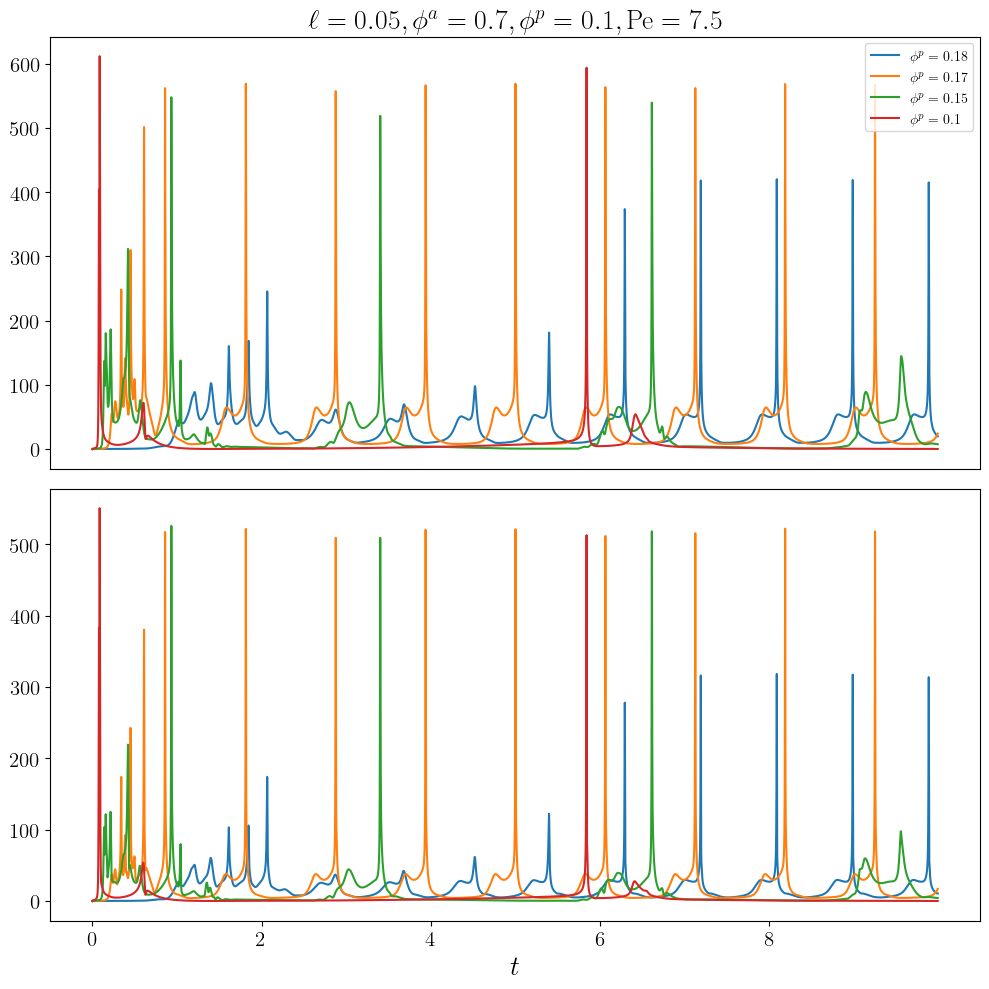

In [35]:
#create figure
using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig, axs = plt.subplots(2, 1, figsize=(10,10))
i = 1
j = 1
im1 = []
im2 = []
#plot data
for ((f_dt,dist_dt),(param, t_saves, fa_saves, fp_saves)) in zip(plot_data,saves)
    ax = axs[1]
    @unpack Pe, ρa, ρp, Dθ = param
    latex_title = latexstring("\$ \\ell = $(round(1/sqrt(Dθ); digits = 2)), \\phi^a = $(ρa), \\phi^p = $(round(ρp; digits = 2)), \\mathrm{Pe} = $(round(Pe; digits = 3))\$")
    ax.set_title(latex_title,fontsize=20)
    #ax.set_aspect(t_max/8)
    latex_str = latexstring("\$ \\phi^p = $(round(ρp; digits = 2)) \$")
    im1 = ax.plot(t_saves,f_dt; label = latex_str)
    i +=1
    #
    ax = axs[2]
    #ax.set_aspect(t_max/8)
    im2 = ax.plot(t_saves,dist_dt; label = latex_str)
    i +=1
    #
end
#format fig setting
rc("text", usetex=true)
for ax in axs
    #ax.yaxis.set_ticks(0.:0.5:1.0)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_tick_params(labelsize=15)
    ax.xaxis.set_tick_params(labelsize=15)
    ax.xaxis.tick_bottom()
    #ax.set_ylabel(L"", fontsize=20)
end
# add bottom labels
axs[2].set_xlabel(L"t",fontsize=20)
axs[2].xaxis.set_ticks(0.:2.0:8.0)
axs[1].legend(loc = "upper right")
fig.tight_layout()
# add colour bars
display(fig)
#save figure
